In [2]:
import kagglehub
import os

# Download the specific dataset you referenced
path = kagglehub.dataset_download("samuelcortinhas/cats-and-dogs-image-classification")

print("The dataset is downloaded to:", path)

# Check what is inside the main folder
# (We use listdir to see if it contains 'train'/'test' folders or 'cats'/'dogs' directly)
files = os.listdir(path)
print("Folder contents:", files)

C:\Users\mmapa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The dataset is downloaded to: C:\Users\mmapa\.cache\kagglehub\datasets\samuelcortinhas\cats-and-dogs-image-classification\versions\4
Folder contents: ['test', 'train']


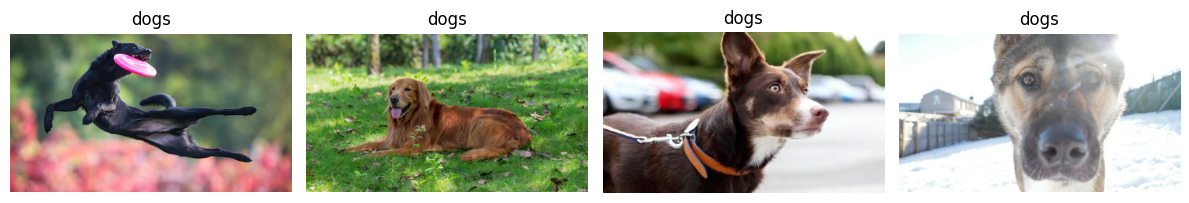

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
import random

# 1. Setup the path (already defined in your code)
# path = kagglehub.dataset_download("varadmurtymohod/messi-vs-ronaldo-image-classification-dataset")

# 2. Get a list of all image files (walking through subdirectories)
image_files = []
for root, dirs, files in os.walk(path):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_files.append(os.path.join(root, file))

# 3. Pick 4 random images to display
sample_images = random.sample(image_files, 4)

# 4. Plotting
plt.figure(figsize=(12, 8))
for i, img_path in enumerate(sample_images):
    plt.subplot(1, 4, i + 1)
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(os.path.basename(os.path.dirname(img_path))) # Show the folder name (the label)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [4]:
import os  #jesli tu wyskoczy ['train', test'] to trzeba zmienic data_dir na data_dir = os.path.join(path, "train")
print("Folders found in main path:", os.listdir(path))

Folders found in main path: ['test', 'train']


In [ ]:
import numpy as np
import os
import cv2
import random

# 1. Setup
# Use the path from kagglehub here
data_dir = os.path.join(path, "train")
# Depending on the dataset structure, you might need to append '/train' 
# e.g., data_dir = os.path.join(path, "train")

CATEGORIES = ["cats", "dogs"] # The folder names
IMG_SIZE = 224 # Resize images to 100x100 (adjust as needed)

training_data = []

def create_training_data():
    for category in CATEGORIES:
        path_to_cat = os.path.join(data_dir, category) 
        class_num = CATEGORIES.index(category) # 0 for cats, 1 for dogs

        # Iterate over each image in the folder
        for img in os.listdir(path_to_cat):
            try:
                # Read the image in grayscale (simplifies data) or color (cv2.IMREAD_COLOR)
                img_array = cv2.imread(os.path.join(path_to_cat, img), cv2.IMREAD_COLOR)
                
                # Resize the image to ensure consistent input size
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                
                # Add to our list
                training_data.append([new_array, class_num])
            except Exception as e:
                # Some images might be broken/corrupt
                pass

create_training_data()

# 2. Shuffle the data
# Important! Otherwise, the model trains on all cats, then all dogs, and gets confused.
random.shuffle(training_data)

# 3. Create X and Y lists
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

# 4. Convert to NumPy Arrays
# X must be reshaped. 
# -1 represents "any number of features"
# 1 represents the channel (1 for grayscale, 3 for RGB)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)

# 5. Normalize X (Optional but highly recommended)
# Pixel values are 0-255. Neural networks like values between 0-1.
X = X / 255.0

print(f"X shape: {X.shape}")
print(f"Number of labels: {len(y)}")

X shape: (557, 224, 224, 3)
Number of labels: 557


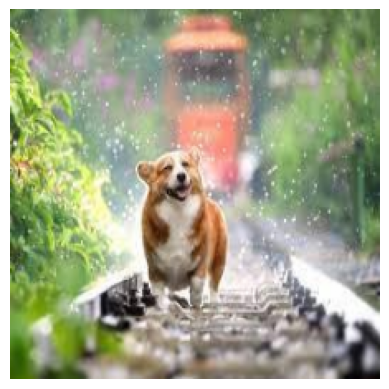

In [30]:
import matplotlib.pyplot as plt

# 1. Grab the first element
img_to_show = X[120] 

# 2. Convert BGR (OpenCV default) to RGB (Matplotlib default)
# Since your data is 0-1 floats, this conversion still works fine
img_to_show = cv2.cvtColor(np.float32(img_to_show), cv2.COLOR_BGR2RGB)

# 3. Display
plt.imshow(img_to_show)
plt.axis('off') # Optional: hides the axes
plt.show()

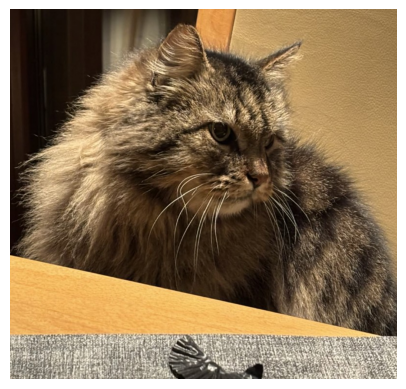

In [35]:
# Replace with your specific file name
my_file = "hugo.jpg" 

# Construct the path (assuming it's in the dogs folder)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
hugoHD = mpimg.imread(my_file)
imgplot = plt.imshow(hugoHD)
plt.axis('off')  # Hide the axes
plt.show()

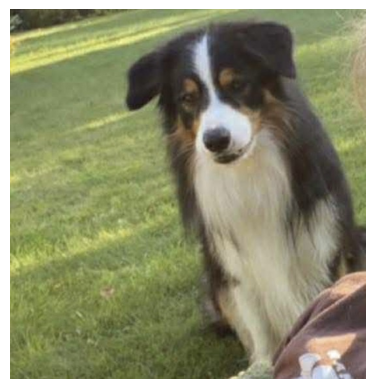

In [57]:
frod = mpimg.imread("frodziu.jpg")
imgplot = plt.imshow(frod)
plt.axis('off')  # Hide the axes
plt.show()

In [47]:
def resize_image(image_path, img_size=224):
    try:
        # Read the image in color
        img_array = cv2.imread(image_path)#, cv2.IMREAD_COLOR)
        
        # Resize the image
        new_array = cv2.resize(img_array, (img_size, img_size))
        
        return new_array
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

In [48]:
hugo2 = resize_image(my_file)

In [52]:
def plot_image(image_array):
    if image_array is None:
        print("Image is None, cannot plot.")
        return

    # FIX: Convert BGR (OpenCV) to RGB (Matplotlib)
    image_rgb = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)
    
    plt.imshow(image_rgb)
    plt.axis('off') 
    plt.show()

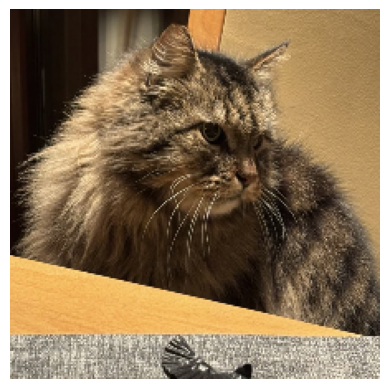

In [53]:
hugo2 = resize_image(my_file)
plot_image(hugo2)

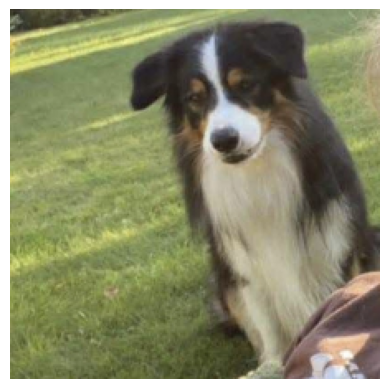

In [58]:
frodziu2 = resize_image("frodziu.jpg")
plot_image(frodziu2)

In [137]:
imagespaths = ['hugo.jpg', 'frodziu.jpg', 'lulajacy67.jpg', 'mylacy_pies.jpg', 'niemowlaki2.jpg', 'jakubiak.jpg', 'lysypiesol.jpg', 'japiesek.jpg', 'smutnywiesniacki.jpg']


In [147]:
folder_name = 'KotPies'

# 2. List all files in that folder that end with .jpg
# This creates a list like ['hugo.jpg', 'frodziu.jpg', ...]
imagespaths = [
    os.path.join(folder_name, f) for f in os.listdir(folder_name) 
    if f.lower().endswith('.jpg')
]

# 3. Check the result
print(f"Found {len(imagespaths)} images:")
print(imagespaths[:5])

Found 17 images:
['KotPies\\brudnypies.jpg', 'KotPies\\frodziu.jpg', 'KotPies\\happypiesek.jpg', 'KotPies\\hugo.jpg', 'KotPies\\jakubiak.jpg']


In [148]:
def resizeAll(image_paths):
    resized_images = []
    for p in image_paths:
        resized_images.append(resize_image(p).reshape(1, IMG_SIZE, IMG_SIZE, 3) / 255.0)
    return resized_images

In [149]:
ready_images = resizeAll(imagespaths)

In [ ]:
plot_image(ready_images.reshape)

error: OpenCV(4.11.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<1,-1,-1>,struct cv::impl::A0x6a3ea619::Set<3,4,-1>,struct cv::impl::A0x6a3ea619::Set<0,2,5>,4>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


In [6]:
y # 0 for cats, 1 for dogs

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,

In [7]:
X

array([[[[0.40392157, 0.62745098, 0.45098039],
         [0.38039216, 0.60784314, 0.43137255],
         [0.34901961, 0.59215686, 0.41176471],
         ...,
         [0.21568627, 0.38823529, 0.32941176],
         [0.21568627, 0.38431373, 0.33333333],
         [0.23137255, 0.39607843, 0.35294118]],

        [[0.37254902, 0.59215686, 0.41568627],
         [0.35686275, 0.58039216, 0.40392157],
         [0.33333333, 0.56862745, 0.39215686],
         ...,
         [0.21960784, 0.38823529, 0.3372549 ],
         [0.21568627, 0.38431373, 0.33333333],
         [0.23921569, 0.4       , 0.35294118]],

        [[0.36470588, 0.57647059, 0.40392157],
         [0.36078431, 0.57647059, 0.4       ],
         [0.35294118, 0.57647059, 0.4       ],
         ...,
         [0.21960784, 0.38823529, 0.34117647],
         [0.21960784, 0.38823529, 0.3372549 ],
         [0.24705882, 0.40392157, 0.35294118]],

        ...,

        [[0.33333333, 0.2745098 , 0.32941176],
         [0.2745098 , 0.20784314, 0.25882353]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [9]:
import tensorflow as tf

In [10]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1), # Rotate by +/- 10%
    tf.keras.layers.RandomZoom(0.1),     # Zoom in/out by +/- 10%
])

CNNmodel2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size=7,strides=2, padding="valid",
                           activation="relu", kernel_initializer="he_normal"),
    data_augmentation,
     tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Lambda(tf.nn.local_response_normalization),
    tf.keras.layers.Conv2D(64, kernel_size=3, padding="valid",
                           activation="relu", kernel_initializer="he_normal"),
     tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, kernel_size=3, padding="valid",
                           activation="relu", kernel_initializer="he_normal"),
                            tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Lambda(tf.nn.local_response_normalization),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(128, kernel_size=3, padding="same",
                           activation="relu", kernel_initializer="he_normal"),
                            tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, kernel_size=3, padding="same",
                           activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.MaxPool2D(),                       
    tf.keras.layers.Conv2D(128, kernel_size=3, padding="same",
                           activation="relu", kernel_initializer="he_normal"),   
                            tf.keras.layers.BatchNormalization(),                    
    #tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation="relu",
                          kernel_initializer="he_normal"),
    
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation="softmax")


])

In [11]:
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-3)
CNNmodel2.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20,
                                                     restore_best_weights=True)

In [12]:
history = CNNmodel2.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping_cb])

Epoch 1/100


14/14 [==============================] - 12s 619ms/step - loss: 2.7609 - accuracy: 0.2710 - val_loss: 36.0034 - val_accuracy: 0.0000e+00
Epoch 2/100
14/14 [==============================] - 8s 598ms/step - loss: 2.3097 - accuracy: 0.3861 - val_loss: 12.2718 - val_accuracy: 0.0071
Epoch 3/100
14/14 [==============================] - 9s 610ms/step - loss: 2.1618 - accuracy: 0.4436 - val_loss: 5.0215 - val_accuracy: 0.0286
Epoch 4/100
14/14 [==============================] - 9s 609ms/step - loss: 1.8732 - accuracy: 0.4940 - val_loss: 6.6196 - val_accuracy: 0.0857
Epoch 5/100
14/14 [==============================] - 8s 594ms/step - loss: 1.6549 - accuracy: 0.5707 - val_loss: 5.4704 - val_accuracy: 0.0786
Epoch 6/100
14/14 [==============================] - 8s 586ms/step - loss: 1.4815 - accuracy: 0.6331 - val_loss: 1.8377 - val_accuracy: 0.5500
Epoch 7/100
14/14 [==============================] - 8s 585ms/step - loss: 1.4395 - accuracy: 0.5995 - val_loss: 2.2726 - val_accurac

5/5 [==============================] - 1s 89ms/step


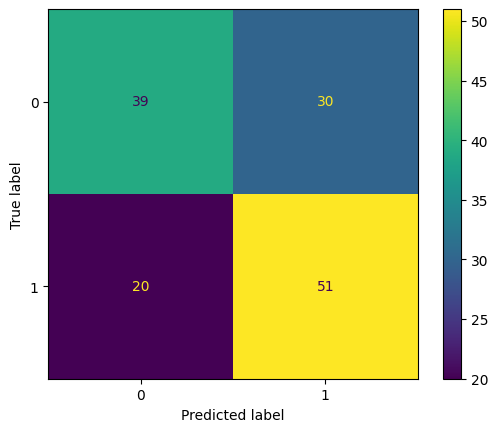

In [13]:
y_pred = CNNmodel2.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

14/14 [==============================] - 1s 98ms/step


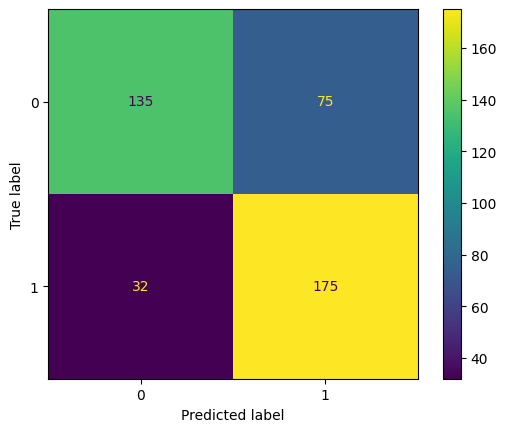

In [14]:
y_pred = CNNmodel2.predict(X_train)
y_pred_classes = np.argmax(y_pred, axis=1)

# Create confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_train, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [15]:
CNNmodel2.evaluate(X_test, y_test)

5/5 [==============================] - 0s 95ms/step - loss: 0.7641 - accuracy: 0.6429


[0.7641469836235046, 0.6428571343421936]

In [66]:
CNNmodel2.predict(hugo2.reshape(1, IMG_SIZE, IMG_SIZE, 3) / 255.0)

1/1 [==============================] - 0s 24ms/step


array([[0.55408293, 0.42681932, 0.00265964, 0.00266012, 0.00160465,
        0.00316096, 0.00203596, 0.002892  , 0.00203774, 0.00204672]],
      dtype=float32)

In [101]:
Ergebnis = CNNmodel2.predict(ready_images[8])

1/1 [==============================] - 0s 29ms/step


In [102]:
Ergebnis

array([[9.4906992e-01, 3.7973884e-02, 1.7239243e-03, 1.4702018e-03,
        9.0716430e-04, 1.5267944e-03, 1.1629461e-03, 2.3855281e-03,
        2.4238897e-03, 1.3557905e-03]], dtype=float32)

In [150]:
ready_batch = np.array(ready_images)

In [151]:
all_predictions = CNNmodel2.predict(ready_batch)

# Check the shape - it should be (Number_of_Images, Number_of_Classes)
print(f"Predicted {all_predictions.shape[0]} images.")

1/1 [==============================] - 0s 88ms/step
Predicted 17 images.


In [ ]:
def plot_with_labels(image_array, predictions):
    n = len(predictions)
    for i in range(n):
        #plot_image(image_array[i])  # Assuming plot_image is defined to show the image
        toprint = mpimg.imread(image_array[i])
        imgplot = plt.imshow(toprint)
        plt.axis('off')  # Hide the axes
        if predictions[i][0] > predictions[i][1]:  
            plt.title("Cat")
        else: 
            plt.title("Dog")
        plt.show()


In [122]:
batch_predictions = CNNmodel2.predict(ready_images[0:10])

print(batch_predictions)


1/1 [==============================] - 0s 33ms/step
[[0.55408293 0.42681932 0.00265964 0.00266012 0.00160465 0.00316096
  0.00203596 0.002892   0.00203774 0.00204672]]


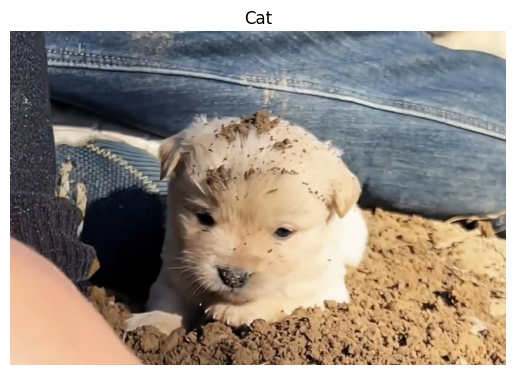

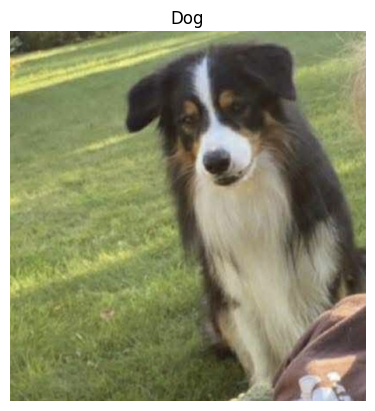

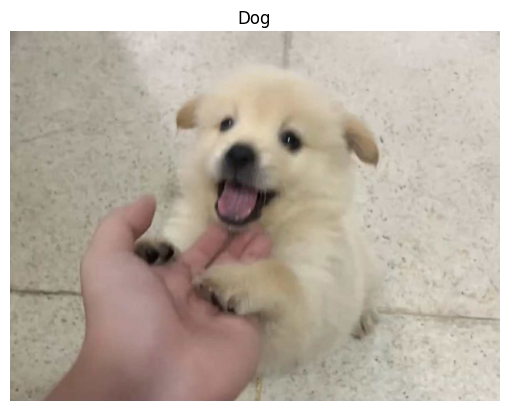

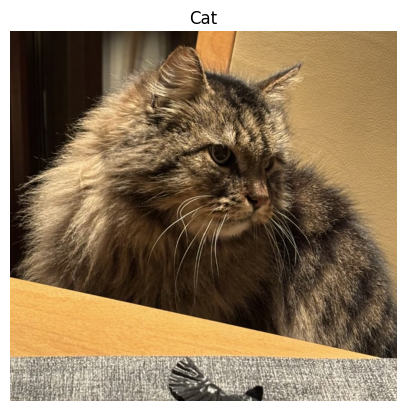

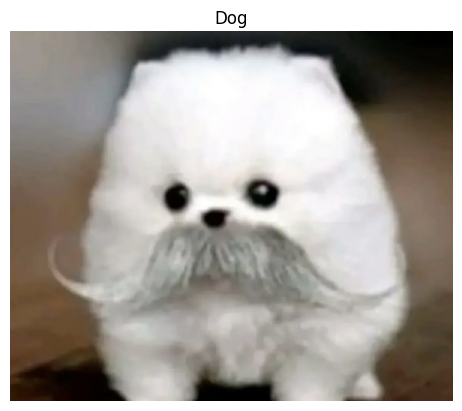

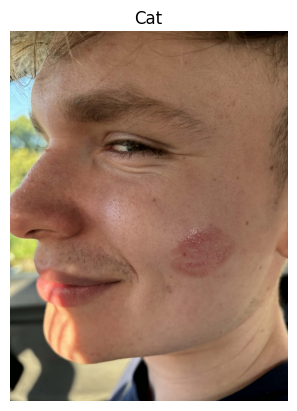

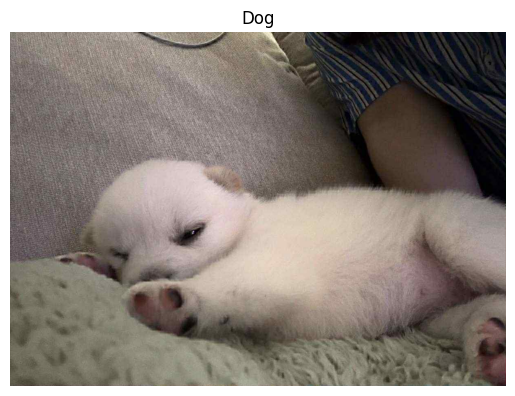

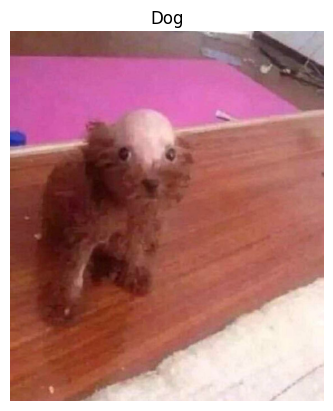

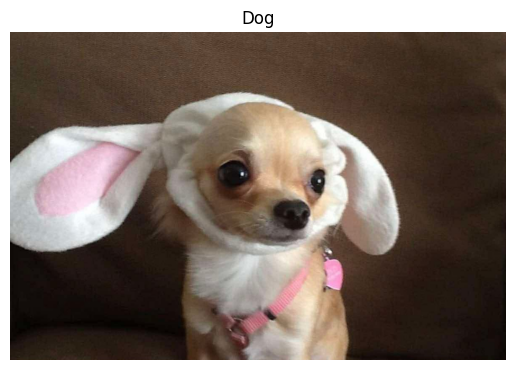

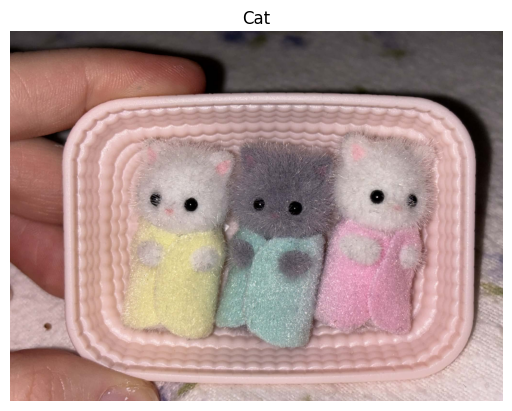

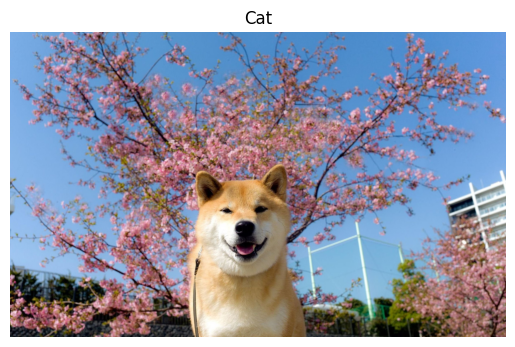

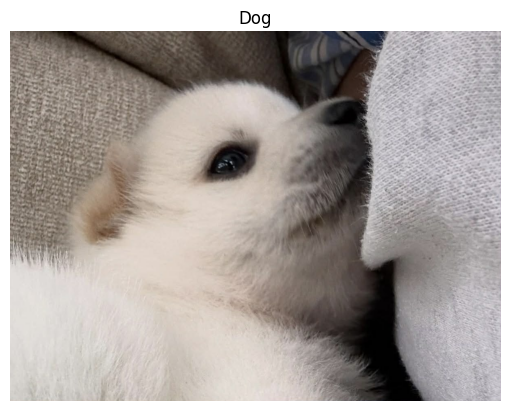

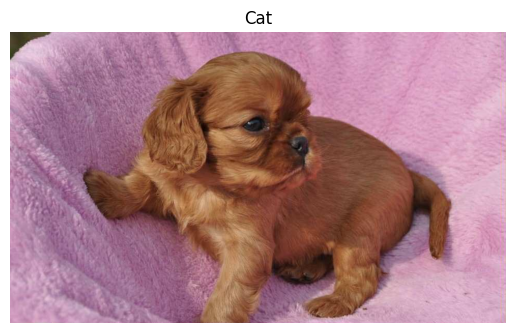

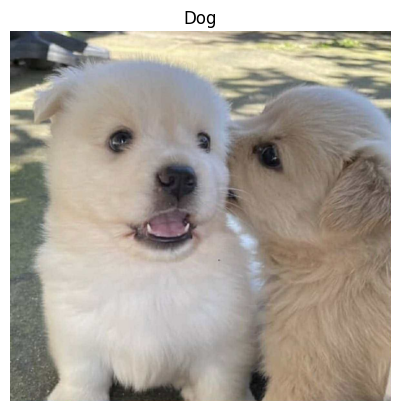

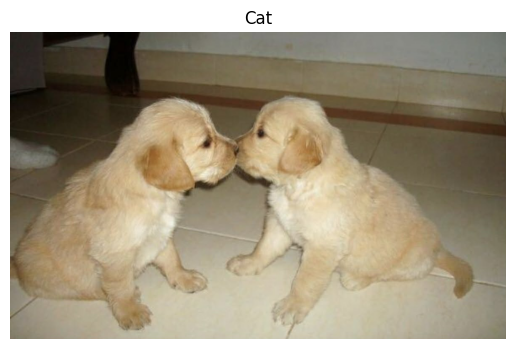

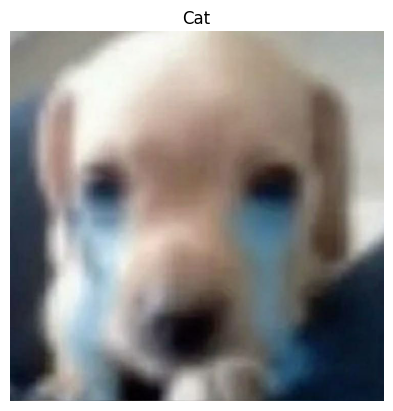

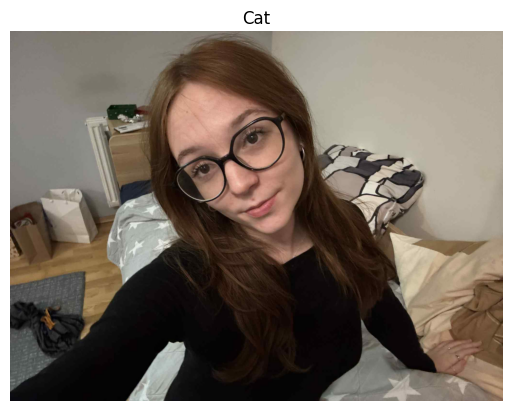

In [152]:
plot_with_labels(imagespaths, all_predictions)

In [109]:
CNNmodel2.predict(frodziu2.reshape(1, IMG_SIZE, IMG_SIZE, 3) / 255.0)

1/1 [==============================] - 0s 22ms/step


array([[0.22175765, 0.769284  , 0.00101117, 0.00152914, 0.00079691,
        0.00111637, 0.00124199, 0.00081174, 0.00108739, 0.00136362]],
      dtype=float32)

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models

def AlexNet(input_shape=(227, 227, 3), num_classes=10):
    model = models.Sequential([
        # Layer 1: Conv + MaxPool + LRN
        layers.Conv2D(96, kernel_size=11, strides=4, padding='valid', activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(pool_size=3, strides=2),
        layers.Lambda(tf.nn.local_response_normalization),

        # Layer 2: Conv + MaxPool + LRN
        layers.Conv2D(256, kernel_size=5, padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=3, strides=2),
        layers.Lambda(tf.nn.local_response_normalization),

        # Layer 3, 4, 5: Conv + Conv + Conv + MaxPool
        layers.Conv2D(384, kernel_size=3, padding='same', activation='relu'),
        layers.Conv2D(384, kernel_size=3, padding='same', activation='relu'),
        layers.Conv2D(256, kernel_size=3, padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=3, strides=2),

        # Layer 6, 7, 8: Flatten + Dense + Dropout
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Initialize the model
alexnet_model = AlexNet(input_shape=(224, 224, 3), num_classes=10)

In [17]:
# Assuming your model is named 'alexnet_model'
alexnet_model.compile(
    optimizer=tf.keras.optimizers.Nadam(learning_rate=0.0001), # Lower LR for stability
    loss='sparse_categorical_crossentropy',                   # Use if your labels are integers (0, 1, 2...)
    metrics=['accuracy']
)

In [18]:
# Training the model
history = alexnet_model.fit(
    X_train, y_train,
    epochs=20,                 # Number of times to see the whole dataset
    batch_size=32,             # Number of images processed before updating weights
    validation_data=(X_test, y_test),
    shuffle=True               # Highly recommended so the model doesn't learn patterns in the order of data
)

Epoch 1/20
14/14 [==============================] - 9s 525ms/step - loss: 1.1888 - accuracy: 0.4772 - val_loss: 0.8235 - val_accuracy: 0.5071
Epoch 2/20
14/14 [==============================] - 7s 509ms/step - loss: 0.7320 - accuracy: 0.5324 - val_loss: 0.7719 - val_accuracy: 0.4929
Epoch 3/20
14/14 [==============================] - 7s 525ms/step - loss: 0.7456 - accuracy: 0.5084 - val_loss: 0.7445 - val_accuracy: 0.5071
Epoch 4/20
14/14 [==============================] - 7s 528ms/step - loss: 0.7483 - accuracy: 0.4772 - val_loss: 0.7048 - val_accuracy: 0.5071
Epoch 5/20
14/14 [==============================] - 7s 521ms/step - loss: 0.7260 - accuracy: 0.4964 - val_loss: 0.7075 - val_accuracy: 0.5429
Epoch 6/20
14/14 [==============================] - 7s 520ms/step - loss: 0.7147 - accuracy: 0.4916 - val_loss: 0.7026 - val_accuracy: 0.5071
Epoch 7/20
14/14 [==============================] - 7s 532ms/step - loss: 0.7170 - accuracy: 0.5204 - val_loss: 0.7801 - val_accuracy: 0.4929
Epoch 